## Implementação de um Classificador Perceptron

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [3]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]


## Questao 1 - Implemente uma função para calcular a acurácia do modelo

In [4]:
def accuracy(x, y, confusion = False):
    pred = np.array(x)
    real = np.array(y)
    if(pred.size != real.size):
        print('different sizes')
        return   
    rClasses = {i:j for i,j in zip(np.unique(real),range(np.unique(real).size))} # realClasses
    
    pClasses = {i:j for i,j in zip(np.unique(pred),range(np.unique(pred).size))} # predictedClasses
#     if(pClasses.keys()!=rClasses.keys()):
        
#         print('classes diferentes \n classes x = %s \n classes y = %s'%(pClasses.keys(),rClasses.keys()))
#         return
    if(confusion):
        ConfMatrix = np.zeros([np.unique(real).size,np.unique(real).size], int)
        for i,j in zip(real,pred):
            ConfMatrix[rClasses[i],pClasses[j]] += 1
#         tp = #TruePositives
#         tn = #TrueNegatives
#         fp = #FalsePositives
#         fn = #FalseNegaives
        acc = round(float(ConfMatrix.diagonal().sum()/ConfMatrix.sum()),2) #Valores preditos corretamente sobre todos os valores
        return acc, ConfMatrix 
    else:
        acc = 0
        for i,j in zip(real,pred):
            acc += 1 if(i==j) else 0
        return round(float(acc/real.size),2)
    
    

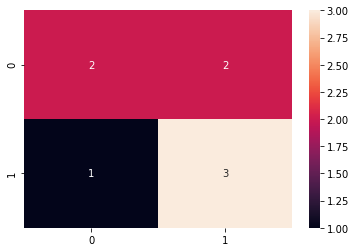

In [5]:
x = np.array([1,1,1,0,0,1,0,1])
y = np.array([1,1,1,0,0,0,1,0])
acc, teste = accuracy(x,y,confusion = True)
teste
sn.heatmap(teste,annot=True)

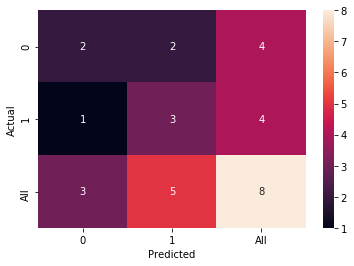

In [6]:
teste = pd.crosstab(y, x, dropna=False, rownames=['Actual'], colnames=['Predicted'], margins = True)
teste
sn.heatmap(teste,annot=True)

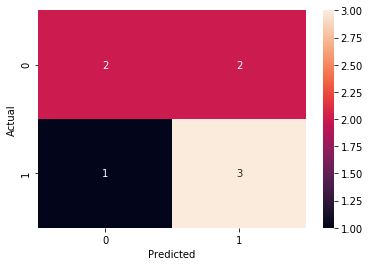

In [7]:
teste = pd.crosstab(y, x, dropna=False, rownames=['Actual'], colnames=['Predicted'])
teste
sn.heatmap(teste,annot=True)

## Questao 2 - Implemente um método de validação cruzada para testar 

### Vamos utilizar o método K-Fold Cross Validation, com um K padrão de 4, porém podendo ser variado

In [8]:
def crossVal(perceptron, x, y, k = 4):
    if(y.shape[0]!= x.shape[0]):
        print('Tamanhos diferentes')
        return
    size = y.shape[0]
    acc = np.zeros(k)
    for i in range(k):
        iTeste = round((i)*size/k)
        fTeste = round((i+1)*size/k)

        xTeste = x[iTeste:fTeste,:] 
        yTeste = y[iTeste:fTeste] 

        xTreino = np.concatenate((x[0:iTeste,:], x[fTeste:,:]), axis=0)
        yTreino = np.concatenate((y[0:iTeste], y[fTeste:]), axis=0)

        perceptron.fit(xTreino, yTreino)
        predict = perceptron.predict(xTeste)
#         #os prints é são para facilitar a conclusão de que a função está funcionndo corretamente
#         print("\nNa iteração %d"%i)
#         print("dado teste = %s"%(xTeste))          
#         print("predição   = %s"%(predict))            
#         print("real       = %s"%(yTeste))            
        acc[i] = accuracy(predict,yTeste)
#         print("com acurárica de %0.02f"%acc[i])
    return acc.mean()

## Teste o classificador usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

# 2.1   Data set sintético com classes  *linearmente separáveis*
## x[n] = [a,b]
## y = 1 se a+b>=2*b, se não y = -1

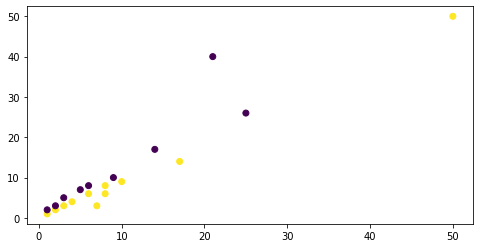

In [9]:
X = np.array([[1,1],[2,2],[2,3],[3,3],[4,4],[5,7],[6,6],[7,3],[8,8],[8,6],[1,2],[3,5],[9,10],[6,8],[10,9],[25,26],[50,50]
             ,[17,14],[14,17],[21,40]])

# esse X comentado gera todas as predições do X_newdata corretos
y = np.zeros(X.shape[0],int)
for i in range(y.size):
    y[i] = 1 if(X[i][0]+X[i][1]>=2*X[i][1]) else -1
plt.figure(figsize=(8,4))
plt.scatter(x = X[:,0], y = X[:,1], c = y)
plt.show()

### Testando o perceptron com 20 amostras, e usando K-Fold Cross Validation, com K = 4

In [10]:

acc = crossVal(ppn, X, y, k = 4)
acc

0.75

# 2.2   Data set sintético com classes $\color{red}{não}$ *lineramente separáveis*
## x[n] = [a,b]
## y = 1 se a+b>=$a^2$, se não y = -1

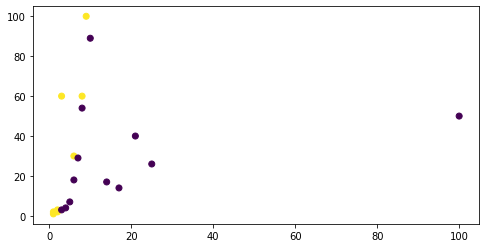

In [11]:
X = np.array([[1,1],[2,2],[2,3],[3,3],[4,4],[5,7],[6,30],[7,29],[8,60],[8,54],[1,2],[3,60],[9,100],[6,18],[10,89],[25,26],
              [100,50],[17,14],[14,17],[21,40]])

# esse X comentado gera todas as predições do X_newdata corretos
y = np.zeros(X.shape[0],int)
for i in range(y.size):
    a = X[i][0]
    b = X[i][1]
    y[i] = 1 if(a+b>=a**2) else -1
    
plt.figure(figsize=(8,4))
plt.scatter(x = X[:,0], y = X[:,1], c = y)
plt.show()

### Testando o perceptron com 20 amostras, e usando K-Fold Cross Validation, com K = 4

In [12]:
    
acc = crossVal(ppn, X, y, k = 4)
acc

0.65

## Questao 3 - Treine um classificador perceptron para os dados de seu estudo de caso

In [113]:
data1 = pd.read_csv('Glaucoma.csv', index_col=0)
data1.head()

,Image,CDR,NRR,Glaucoma
0,drishtiGS_002,0.303210,0.659688,1
1,drishtiGS_004,0.278477,1.030459,1
2,drishtiGS_008,0.432337,0.921558,-1
3,drishtiGS_010,0.552397,1.192466,1
4,drishtiGS_012,0.546590,0.748638,1


In [114]:
data2 = pd.read_csv('GlaucomaKaggle.csv', index_col=0)
data2.head()

,Image,CDR,NRR,Glaucoma
0,image100prime.tif,0.126922,0.433630,1
1,image101prime.tif,0.264441,0.299960,1
2,image102prime.tif,0.160221,0.313630,1
3,image103prime.tif,0.172314,0.009395,1
4,image104prime.tif,0.249229,0.556696,1


In [116]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Image     200 non-null    object 
 1   CDR       200 non-null    float64
 2   NRR       200 non-null    float64
 3   Glaucoma  200 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB


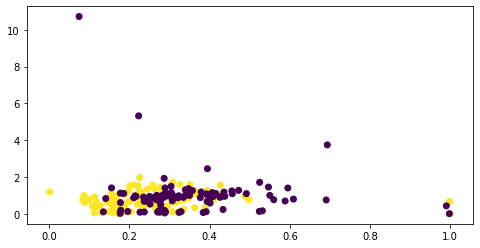

In [47]:
plt.figure(figsize=(8,4))
plt.scatter('CDR','NRR',data=data,c='Glaucoma')

In [60]:
x = data.iloc[:,1:3].values
y = data.iloc[:,3].values

In [62]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)